In [1]:
keys = ['acl_arc_intent_classification', 'anat_em_ner', 
        'annotated_materials_syntheses_events', 'bc7_litcovid_topic_classification', 
        'bioasq_factoid_qa', 'bioasq_general_qa', 'bioasq_list_qa', 'bioasq_yesno_qa', 
        'biored_ner', 'cdr_ner', 'chemdner_ner', 'chemprot_ner', 'chemprot_re', 
        'chemsum_single_document_summarization', 'chemtables_te', 'chia_ner', 
        'covid_deepset_qa', 'covidfact_entailment', 'craftchem_ner', 'data_reco_mcq_mc', 
        'data_reco_mcq_sc', 'ddi_ner', 'discomat_te', 'drug_combo_extraction_re', 
        'evidence_inference', 'genia_ner', 'gnormplus_ner', 'healthver_entailment', 
        'linnaeus_ner', 'medmentions_ner', 'mltables_te', 'mslr2022_cochrane_multidoc_summarization', 
        'mslr2022_ms2_multidoc_summarization', 'multicite_intent_classification', 
        'multixscience_multidoc_summarization', 'mup_single_document_summarization', 
        'ncbi_ner', 'nlmchem_ner', 'nlmgene_ner', 'pico_ner', 'pubmedqa_qa', 'qasa_abstractive_qa', 
        'qasper_abstractive_qa', 'qasper_extractive_qa', 'scicite_classification', 
        'scientific_lay_summarisation_elife_single_doc_summ', 'scientific_lay_summarisation_plos_single_doc_summ', 
        'scientific_papers_summarization_single_doc_arxiv', 'scientific_papers_summarization_single_doc_pubmed', 
        'scierc_ner', 'scierc_re', 'scifact_entailment', 'scireviewgen_multidoc_summarization', 'scitldr_aic']

In [2]:
import datasets
import pandas as pd


all_input_toks = []
all_output_toks = []

for subset in keys:
    # Load the 'train' split for the current subset
    data = datasets.load_dataset("ai2-adapt-dev/science-adapt-4096",subset)['train']
    all_input_toks.extend(data['_input_toks'])
    all_output_toks.extend(data['_output_toks'])

# Create a DataFrame from the collected token counts
df_tokens = pd.DataFrame({
    'Input Tokens': all_input_toks,
    'Output Tokens': all_output_toks
})

df_tokens.to_csv('token_counts.csv', index=False)

In [3]:
print(len(all_input_toks))
print(len(all_output_toks))

70521
70521


In [4]:
df_tokens.describe()

,Input Tokens,Output Tokens
count,70521.000000,70521.000000
mean,1242.898399,139.605082
std,1123.002751,207.580493
min,64.000000,1.000000
25%,453.000000,11.000000
50%,721.000000,80.000000
75%,1865.000000,195.000000
max,4050.000000,3841.000000


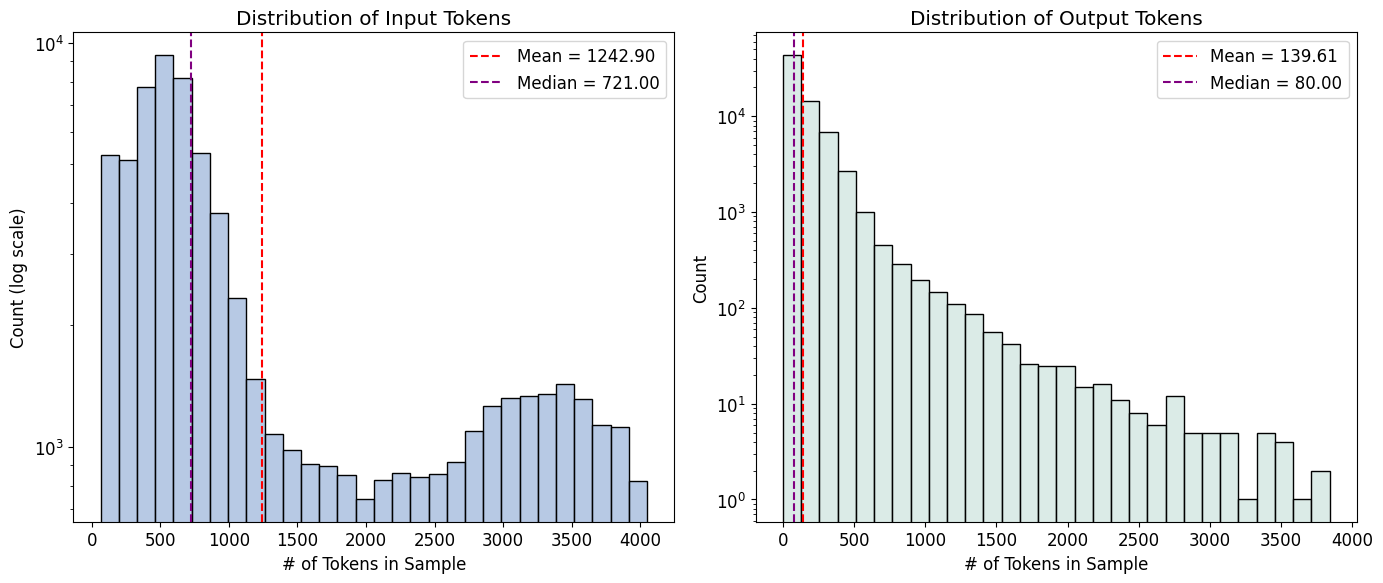

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6)) 

plt.rcParams.update({'font.size': 12, 'font.family': 'Sans Serif'})

# Input Tokens Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_tokens['Input Tokens'], bins=30, kde=False, color='#9FB7DC')  # Using Hex code for color
plt.title('Distribution of Input Tokens')
plt.xlabel('# of Tokens in Sample')
plt.ylabel('Count (log scale)')
plt.yscale('log')
plt.axvline(df_tokens['Input Tokens'].mean(), color='red', linestyle='--', label=f'Mean = {df_tokens["Input Tokens"].mean():.2f}')
plt.axvline(df_tokens['Input Tokens'].median(), color='purple', linestyle='--', label=f'Median = {df_tokens["Input Tokens"].median():.2f}')
plt.legend()

# Output Tokens Histogram
plt.subplot(1, 2, 2)
sns.histplot(df_tokens['Output Tokens'], bins=30, kde=False, color='#D0E5DF')  # Using Hex code for color
plt.title('Distribution of Output Tokens')
plt.xlabel('# of Tokens in Sample')


plt.yscale('log')
plt.axvline(df_tokens['Output Tokens'].mean(), color='red', linestyle='--', label=f'Mean = {df_tokens["Output Tokens"].mean():.2f}')
plt.axvline(df_tokens['Output Tokens'].median(), color='purple', linestyle='--', label=f'Median = {df_tokens["Output Tokens"].median():.2f}')
plt.legend()

plt.tight_layout()
plt.show()